## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
# Load file
df = pd.read_csv('opsd_germany_daily.csv', index_col='Date', parse_dates=True)
print(df.head(5))

            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN


In [4]:
# Description
print(df.describe())

       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [16]:
# Transform the dates into datetime format
df.index = pd.to_datetime(df.index)
type(df.index)


pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

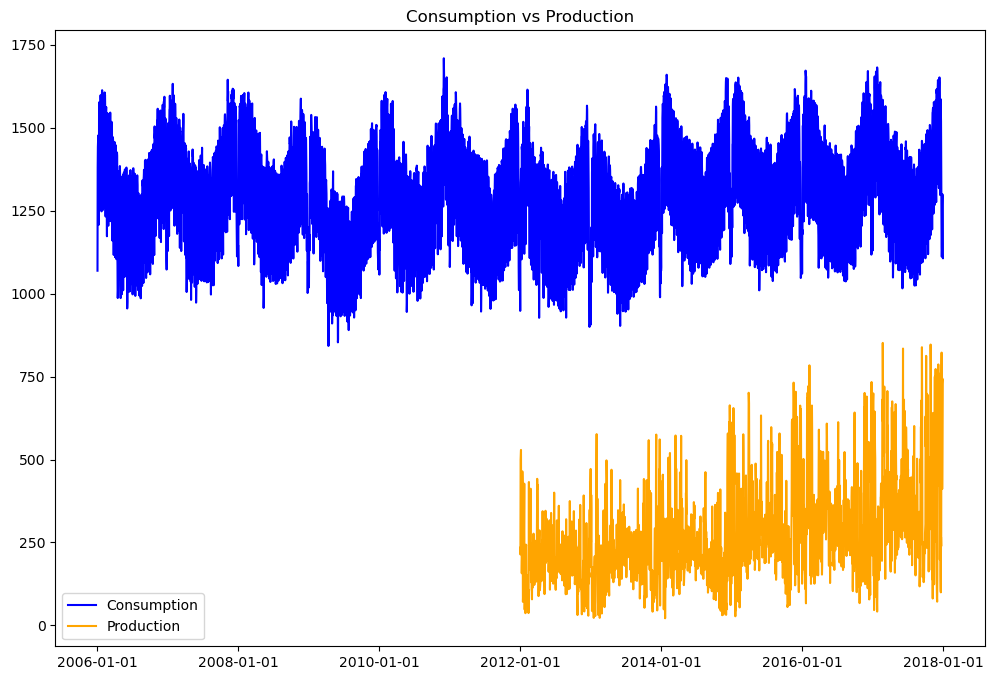

In [29]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Consumption'], color='blue', label='Consumption')
plt.plot(df.index, df['Wind+Solar'], color='orange', label='Production')
plt.xticks(['2006', '2008', '2010', '2012', '2014', '2016', '2018'])
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
plt.title('Consumption vs Production')
plt.legend(loc="lower left")

# Display the plot
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

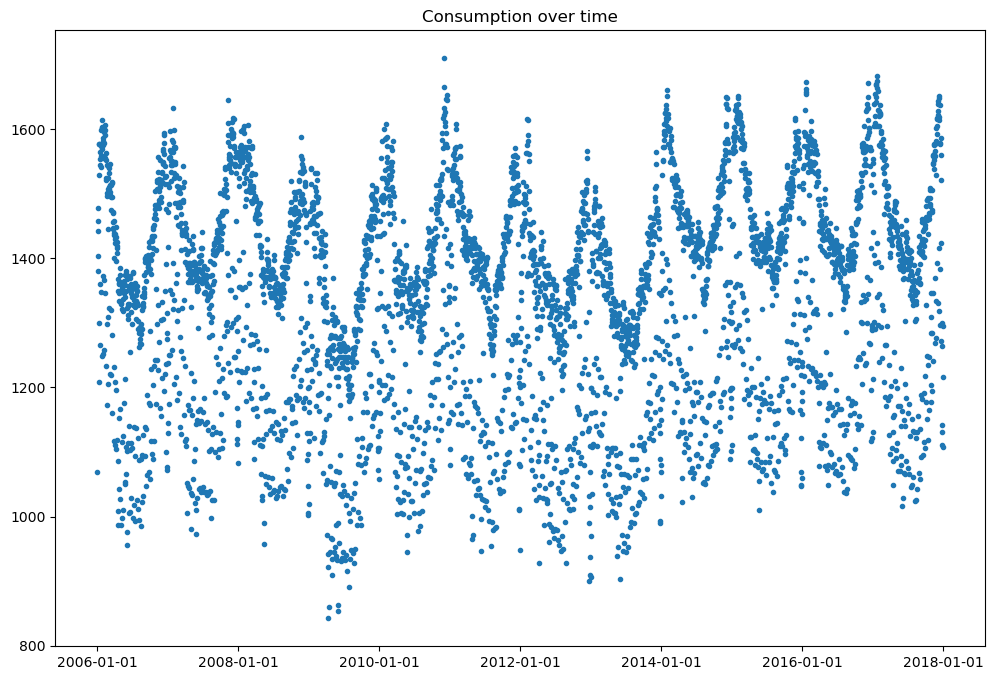

In [42]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5, linestyle = "None", marker='.')
plt.xticks(['2006', '2008', '2010', '2012', '2014', '2016', '2018'])
plt.yticks([800, 1000, 1200, 1400, 1600])
plt.title('Consumption over time')
plt.show()

And plot the production over time :

ValueError: Do not know how to convert '.' to dashes

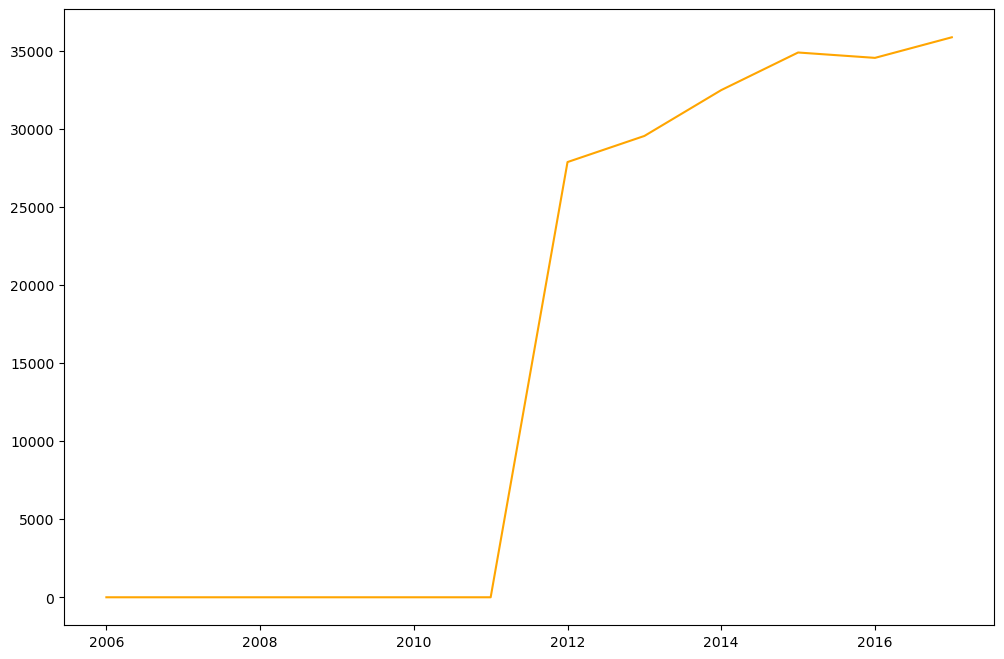

In [47]:
plt.figure(figsize=(12,8))
plt.plot(df.index.year.unique(), df.groupby(df.index.year)['Solar'].sum(), color='orange', label='Solar', linestyle='-')
plt.scatter(df.index.year.unique(), df.groupby(df.index.year)['Wind'].sum(), color='blue', label='Wind', linestyle='.')
plt.xticks(range(2010, 2019))
plt.yticks(range(0, 801, 200))
plt.legend(loc='upper left')
plt.title('Production Over Time')
plt.show()


What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

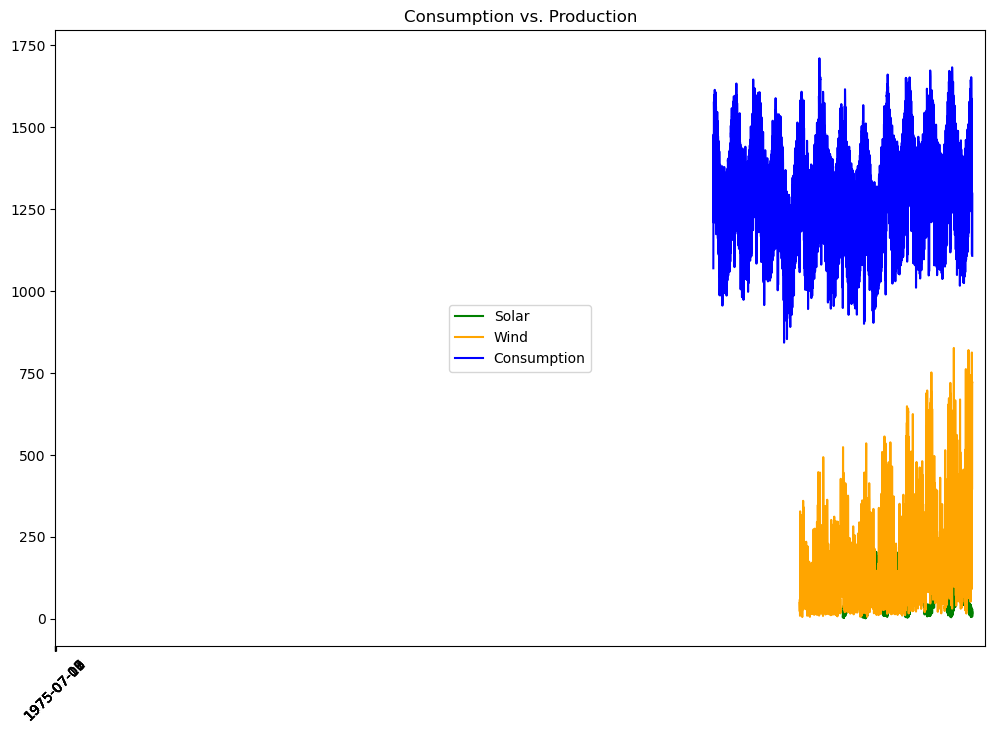

In [56]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Solar'], color='green', label='Solar', linestyle='-')
plt.plot(df.index, df['Wind'], color='orange', label='Wind', linestyle='-')
plt.plot(df.index, df['Consumption'], color='blue', label='Consumption', linestyle='-')
plt.xticks([2012, 2013, 2014, 2015, 2016, 2017, 2018], rotation=45)
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
plt.legend(loc='center')
plt.title('Consumption vs. Production')
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

In [64]:
# Plot over the year
plt.figure(figsize=(12,8))
yearly_data = df.groupby(df['Date'].dt.year).sum()
plt.plot(yearly_data.index, yearly_data['Consumption'], label='Consumption', color='blue')
plt.xticks(['2017-01', '2017-03', '2017-05', '2017-07', '2017-09', '2017-11', '2018-01'])
plt.yticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])
plt.title('Electricity Consumption in 2017')
plt.xlim('2017-01', '2018-01')
plt.show()

KeyError: 'Date'

<Figure size 1200x800 with 0 Axes>

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

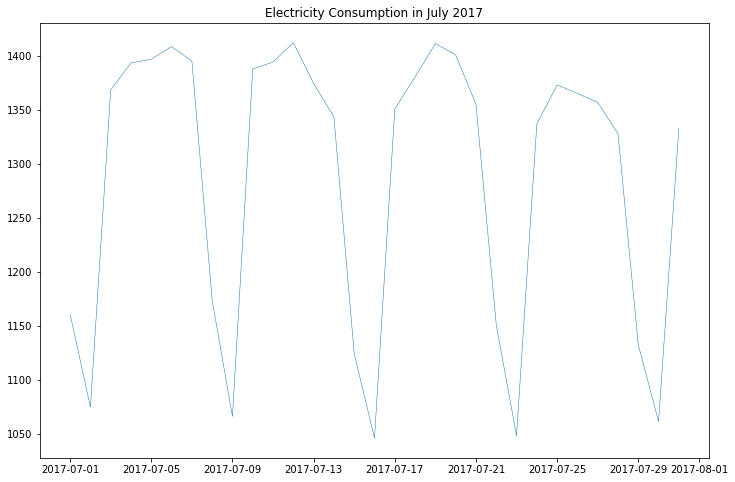

In [16]:
# Plot over a month
plt.figure(figsize=(12,8))
...
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

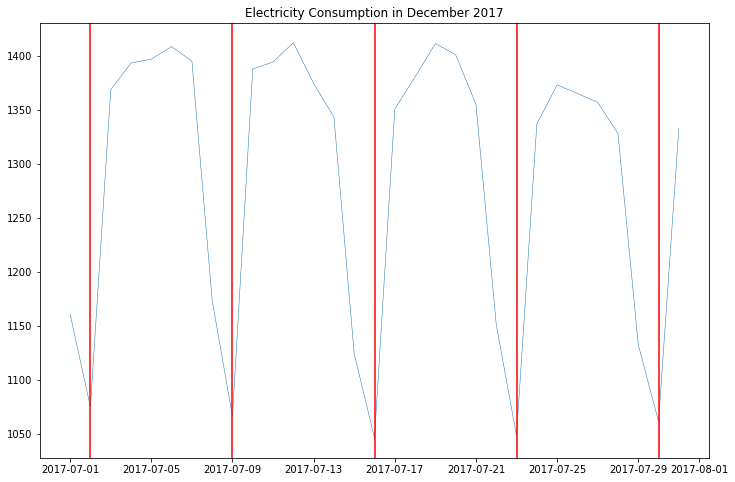

In [22]:
# Plot on Sundays
plt.figure(figsize=(12,8))
...
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [65]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = 2006
df_2['month'] = 'Jan'
years = df_2['year'].unique()
print(years)
df_2.head()

[2006]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


In [152]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='Consumption', data=df-2)
plt.xticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
plt.yticks([800, 1000, 1200, 1400, 1600])
plt.title('Aggregated values by Year')
plt.show()

ValueError: Could not interpret input 'year'

<Figure size 1200x800 with 0 Axes>

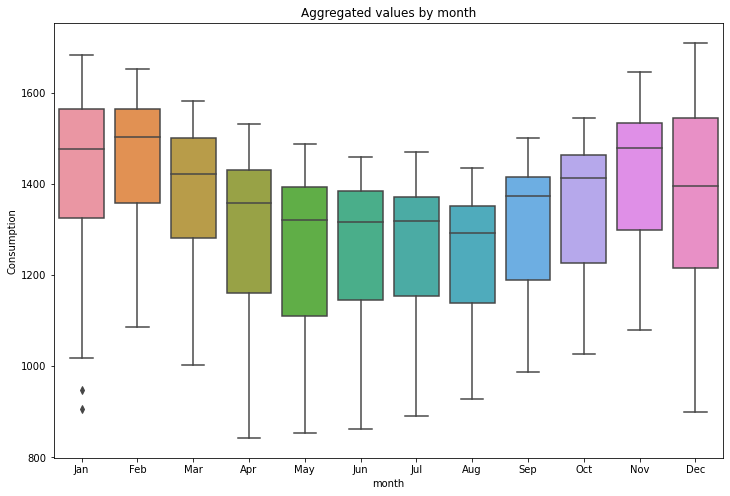

In [27]:
# Boxplot month
plt.figure(figsize=(12,8))
...
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

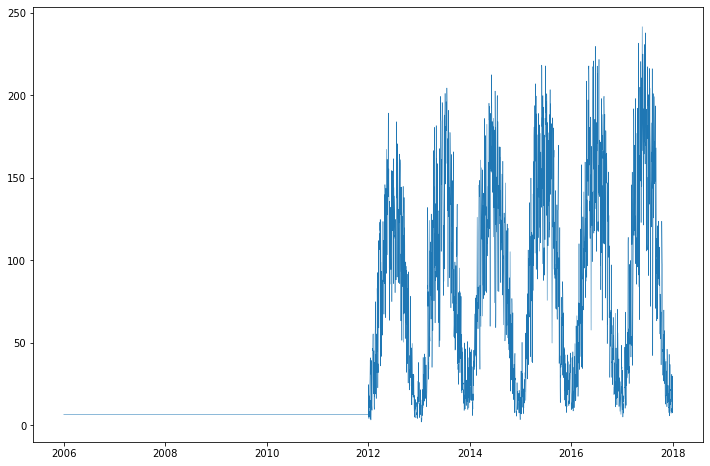

In [28]:
# Plot Solar
plt.figure(figsize=(12,8))
...
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [29]:
# Correlation between consumption and overall production
...

0.02764784385924093

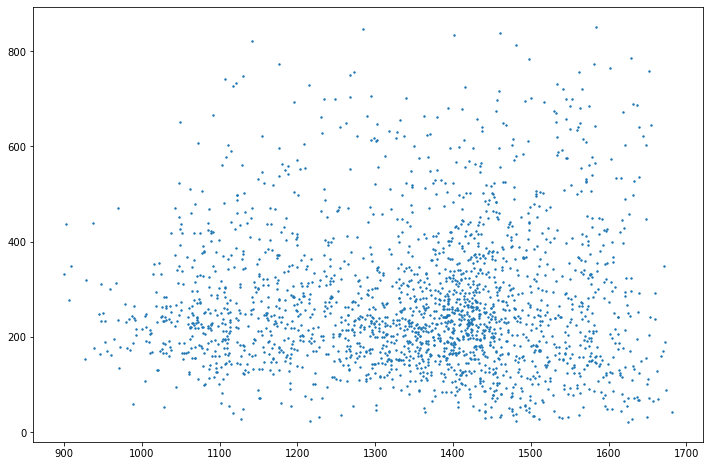

In [30]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

In [31]:
# Correlation between solar production and wind production
...

-0.3088318295977341

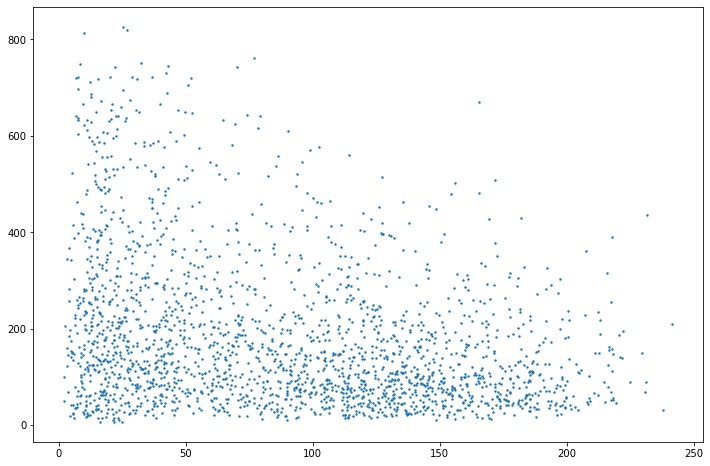

In [32]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

In [33]:
# Correlation between consumption and wind production
...

0.13518640075918514

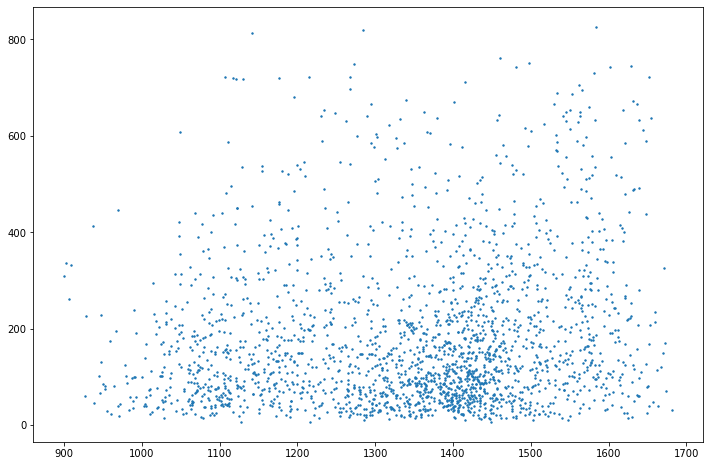

In [34]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

In [35]:
# Correlation between consumption and solar production
...

-0.2789426551991438

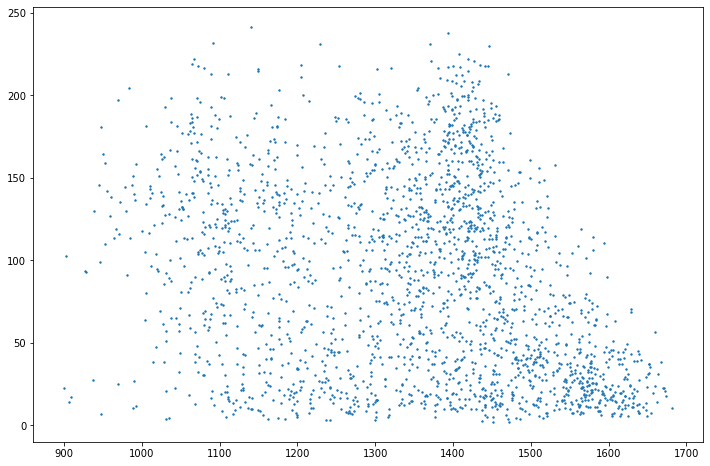

In [38]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()